In [5]:
import sys
sys.path.append('../')
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from PIL import Image
from sfp_nsdsyn import utils, prep, stim    

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
rc = {'text.color': 'black',
      'axes.labelcolor': 'black',
      'xtick.color': 'black',
      'ytick.color': 'black',
      'axes.edgecolor': 'black',
      'font.family': 'Helvetica',
      'axes.linewidth': 1,
      'axes.labelpad': 6,
      'xtick.major.pad': 10,
      'xtick.major.width': 1,
      'ytick.major.width': 1,
      'lines.linewidth': 1,
      'font.size': 12,
      'axes.titlesize': 12,
      'axes.titleweight': 'bold',
      'axes.labelsize': 12,
      'xtick.labelsize': 10,
      'ytick.labelsize': 10,
      'legend.title_fontsize': 11,
      'legend.fontsize': 11,
      'figure.titlesize': 11,
      'figure.dpi': 72 * 3,
      'savefig.dpi': 72 * 4
      }
mpl.rcParams.update(rc)

In [7]:
your_path = '/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsdsyn_stim_description_corrected.csv'
stim_info_df = prep.load_stim_info_as_df(your_path, drop_phase=False, force_download=False)
stim_info_df.head()

,image_idx,stim_idx,w_r,w_a,phase,class_idx,phase_idx,names,freq_lvl
0,105,0,0.0,-6.0,0.000000,0,0,pinwheel,0
1,106,1,0.0,-6.0,1.570796,0,2,pinwheel,0
2,107,2,0.0,-6.0,3.141593,0,4,pinwheel,0
3,108,3,0.0,-6.0,4.712389,0,6,pinwheel,0
4,109,4,0.0,-11.0,0.000000,1,0,pinwheel,1


In [52]:
im_numbers = [105, 113, 129, 137, 153, 161, 177, 185]
img_to_draw = stim_info_df.query('image_idx in @im_numbers').sort_values('freq_lvl')
img_to_draw

,image_idx,stim_idx,w_r,w_a,phase,class_idx,phase_idx,names,freq_lvl
0,105,0,0.0,-6.0,0.0,0,0,pinwheel,0
24,129,24,4.0,-4.0,0.0,6,0,forward spiral,0
48,153,48,6.0,-0.0,0.0,12,0,annulus,0
72,177,72,4.0,4.0,0.0,18,0,reverse spiral,0
8,113,8,0.0,-20.0,0.0,2,0,pinwheel,2
32,137,32,14.0,-14.0,0.0,8,0,forward spiral,2
56,161,56,20.0,-0.0,0.0,14,0,annulus,2
80,185,80,14.0,14.0,0.0,20,0,reverse spiral,2


In [ ]:
# create images using w_a and w_r and phi
# Create a numpy array to hold the generated images
stims = np.zeros((len(img_to_draw), 512, 512))
for i, row in enumerate(img_to_draw.itertuples()):
    stims[i] = stim.make_img(row.w_r, row.w_a, row.phase, imsize=512)


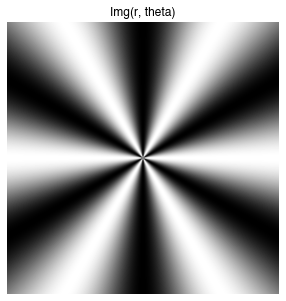

In [55]:
plt.figure(figsize=(5, 5))
plt.imshow(stim, cmap="gray")
plt.title("Img(r, theta)")
plt.axis("off")
plt.show()

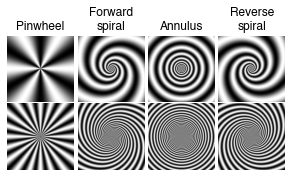

In [37]:

fig, axes = plt.subplots(2, 4, figsize=(5,2.47))
names = ['Pinwheel', 'Forward\nspiral', 'Annulus', 'Reverse\nspiral']
for i in range(4): 
    axes[0,i].set_title(f'{names[i]}')

for i, ax in enumerate(axes.flatten()):
    ax.imshow(stims[i,:,:], cmap='gray', vmin=-1, vmax=1)
    ax.axis('off')

fig.subplots_adjust(wspace=0.04, hspace=0.02)



In [38]:
width, height = (1360, 714) #image size
# Calculate the coordinates for the center crop
left = (width - 714) // 2
top = (height - 714) // 2
right = left + 714
bottom = top + 714

105
113
129
137
153
161
177
185


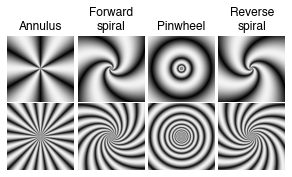

In [39]:
fig, axes = plt.subplots(2, 4, figsize=(5,2.47))
names = ['Annulus', 'Forward\nspiral', 'Pinwheel', 'Reverse\nspiral']
for i in range(4): 
    axes[0,i].set_title(f'{names[i]}')
    for kk, k in enumerate([0,2]):
        print(105+k*4+i*24)
        pic = os.path.join('/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsddata/stimuli/nsdsynthetic/nsdsynthetic', f'nsdsynthetic{105+k*4+i*24}.png')
        img = Image.open(pic).convert('L')        
        # Crop the image
        img_cropped = img.crop((left, top, right, bottom))
        axes[kk,i].imshow(img_cropped, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
        axes[kk,i].axis('off')

fig.subplots_adjust(wspace=0.04, hspace=0.02)
